In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
import gym

from scan_gym import envs
#imp.reload(envs)

seed=42
np.random.seed(seed)

import random

In [2]:
def plot_vol(vol):
    # for creating a responsive plot
    %matplotlib widget

    # importing required libraries
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    #x,y,z = np.where(vol[:64,:64,:128]==1)
    
    x,y,z = np.where(vol==1)

    # creating figure
    fig = plt.figure()
    ax = Axes3D(fig)

    #ax.set_xlim3d(0, 10)
    #ax.set_ylim3d(0, 10)
    #ax.set_zlim3d(0, 10)

    #ax.set_xlim3d(0, 140)
    #ax.set_ylim3d(0, 140)
    #ax.set_zlim3d(0, 140)

    # creating the plot
    ax.scatter(x, y, z, color='green',s=1)

    #x,y,z = np.where(spc.sc.values()==0)
    #plot_geeks = ax.scatter(x, y, z, color='red',s=1)

    # setting title and labels
    ax.set_title("3D plot")
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.grid()
    
    #make  0 origin coincide in all axis
    ax.xaxis._axinfo['juggled'] = (0,0,0)
    ax.yaxis._axinfo['juggled'] = (1,1,1)
    ax.zaxis._axinfo['juggled'] = (2,2,2)
    
    ax.view_init(90, 0)

    # displaying the plot
    plt.show()

In [3]:
models = ['206_2d','211_2d']
scan_env = gym.make('ScannerEnv-v1', models_path='/home/pico/uni/romi/scanner-gym_models', train_models=models)

In [4]:
state = scan_env.reset()
print(state[2], state[3])

[14] [2]


In [5]:
plot_vol(state[1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
state = scan_env.step(23)
print(state[0][2],state[0][3],state[2],state[3])

[59] [3] False {}


In [18]:
plot_vol(state[0][1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

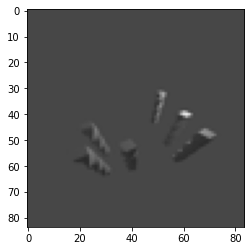

In [10]:
%matplotlib inline
plt.imshow(state[0][0][:,:,2],cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [94]:
scan_env.spc.gt_compare_solid()

0.6698164146868251

In [20]:
for i in range(180*4):
    state = scan_env.step(1)

In [8]:
im = scan_env.spc.get_image(0,0)

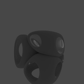

In [9]:
im

In [10]:
type(im)

PIL.Image.Image

In [7]:
nim = np.array(im)
%matplotlib inline
plt.imshow(nim,cmap='gray', vmin = 0, vmax = 255)
plt.show()

NameError: name 'im' is not defined

In [ ]:
for i in range(10000):
    state = scan_env.step(random.randint(0, 23))
    if state[2] == True:
        scan_env.reset()

In [7]:
(14*60)/10000

0.048

In [12]:
def minMaxNorm(old, oldmin, oldmax , newmin , newmax):
        return ( (old-oldmin)*(newmax-newmin)/(oldmax-oldmin) ) + newmin

def theta_from_continuous(cont):
    return int(minMaxNorm(cont,-1.0,+1.0,0,179))

In [27]:
theta_from_continuous(.989)

178